# Store Transactions Full Analysis
## We will analysis whole dataset to get good insights from it !
### This is a store in US, people order lot of orders from all states in US.


### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':[6, 6]}, font_scale = 1.2)

### Read Dataset

In [2]:
dataset = pd.read_excel('SuperStoreUS.xlsx')
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838


### Explore Data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Sub-Category  1952 non-null   object        
 11  Product Container     1952 non-null   object        
 12  Product Name          1952 non-null   object        
 13  Product Base Margi

**Notes:**
* As we see there is null values in our dataset.
* There is no problems in types of these features all good.

### Data Analysis 
**Questions:**
1. What is the distribution of days the order takes depends on it's priority ?!
2. What is the most effective delivery  way ?!
3. There is a relationship between priority and profit ?!
4. Which category sells more and in which state ?!
5. What is the number of order in each region and it's profit ?!
6. In which month we have best sales ?!
7. In which month we have least sales ?!
8. What is the number of orders depends on it's priority and it's profit ?!
9. Which state has most profit ?!
10. Which state has least profit ?!
11. Which city in most profit state has most profit ?!
12. Which city in least profit state has least profit ?!

### 1. What is the distribution of days the order takes depends on it's priority ?!

To solve this questions we found that we have 2 features:
- **Order Date:** that represents the date of the order.
- **Ship Date:** that represents the date of the delivery to customer.

To get the average we want to get the days between 2 dates first.

In [4]:
def days_between(data):
    return abs((data['Order Date'] - data['Ship Date']).days)

dataset['days'] = dataset[['Order Date', 'Ship Date']].apply(days_between, axis = 1)
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,days
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,1
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,2
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,2
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,2
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,1


GOOD!, Now we want to group these days with it's priority to get average of days depend on pripority.

In [5]:
dataset.groupby('Order Priority').describe()['days'].T

Order Priority,Critical,Critical,High,Low,Medium,Not Specified
count,390.000000,1.0,391.000000,398.000000,376.000000,396.000000
mean,1.407692,2.0,1.352941,4.050251,1.414894,1.424242
std,0.779191,NaN,0.773427,2.520942,0.743463,0.809324
min,0.000000,2.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.0,1.000000,2.000000,1.000000,1.000000
50%,1.000000,2.0,1.000000,4.000000,1.000000,1.000000
75%,2.000000,2.0,2.000000,6.000000,2.000000,2.000000
max,3.000000,2.0,4.000000,10.000000,3.000000,3.000000


<AxesSubplot:xlabel='days', ylabel='Density'>

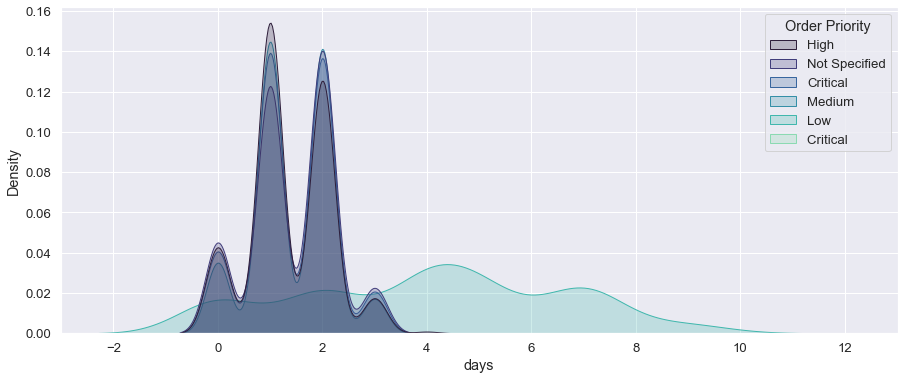

In [6]:
plt.figure(figsize = (15, 6)) 
sns.kdeplot(x = 'days', data = dataset, hue = 'Order Priority', palette = 'mako', shade = True, warn_singular=False)

**Notes:** 
* We found that number of days change depend on order's prioprity.
* Low priority has more days in delivery as a max, or average.
* High priority is the fastest delivery between all of them.

### 2. What is the most effective delivery  way ?!
We talk about a delivery way so count on **Ship Mode** feature.

In [7]:
dataset['Ship Mode'].unique()

array(['Express Air', 'Delivery Truck', 'Regular Air'], dtype=object)

**Note:** We have 3 ways to delivery an order.

Text(0.5, 1.0, 'Ship Mode Counts')

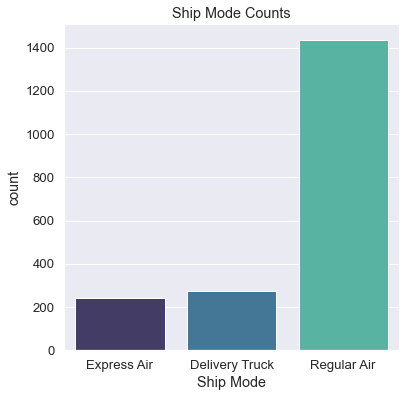

In [8]:
sns.countplot(data = dataset, x = 'Ship Mode', palette='mako')
plt.title('Ship Mode Counts')

**Note:** As we see we found that the most ship way delvires the order is **Regular Air.**

Let's see it with **Order Priotity**.

Text(0.5, 1.0, 'Ship Mode with Order Priority')

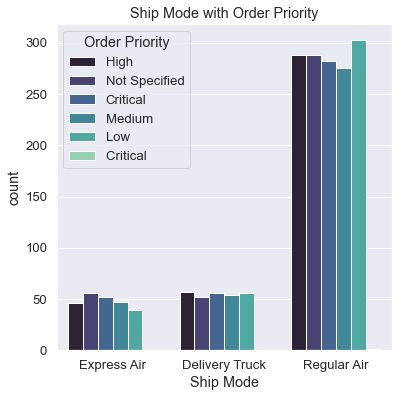

In [9]:
sns.countplot(data = dataset, x = 'Ship Mode', hue = 'Order Priority', palette = 'mako')
plt.title('Ship Mode with Order Priority')

**Note:** As expected the **Regular Air** is the most effective way.

Let's see average days each way takes to delivery an order.

In [10]:
dataset.groupby('Ship Mode').describe()['days'].T

Ship Mode,Delivery Truck,Express Air,Regular Air
count,275.000000,240.000000,1437.00000
mean,1.894545,1.800000,1.97286
std,1.625461,1.420708,1.76470
min,0.000000,0.000000,0.00000
25%,1.000000,1.000000,1.00000
50%,2.000000,2.000000,2.00000
75%,2.000000,2.000000,2.00000
max,9.000000,8.000000,10.00000


**Notes:**
* We found that average of days **Regular Air** takes in delivering an order is more than 2 other ways.
* But if we look in deep we found that the count of orders that depends on **Regular Air** is much more from the other.
* So still **Regular Air** is the best way to delviry an order in each priority.

### 3. There is a relationship between priority and profit ?!

In [11]:
dataset.groupby('Order Priority').describe()['Shipping Cost'].T

Order Priority,Critical,Critical,High,Low,Medium,Not Specified
count,390.000000,1.00,391.000000,398.000000,376.000000,396.000000
mean,13.109333,2.99,13.323657,13.831734,12.692952,11.896641
std,19.817534,NaN,16.809617,18.194728,16.129871,15.813592
min,0.490000,2.99,0.490000,0.490000,0.500000,0.490000
25%,2.990000,2.99,2.995000,3.300000,3.925000,3.352500
50%,5.775000,2.99,6.890000,6.275000,6.050000,5.930000
75%,13.500000,2.99,15.100000,17.552500,13.992500,12.627500
max,164.730000,2.99,99.000000,110.200000,91.050000,91.050000


**Notes:**
* Ths shipping Cost depends on the direction of order. 
* As the mean we found that higher Shipping Cost is Low Priority and least is Not Specified Priority.
* Let's check this with profit.

In [12]:
dataset.groupby('Order Priority').describe()['Profit'].T

Order Priority,Critical,Critical,High,Low,Medium,Not Specified
count,390.000000,1.0000,391.000000,398.000000,376.000000,396.000000
mean,98.268814,-19.0992,93.351742,88.982043,115.346069,177.995878
std,1147.049132,NaN,852.304277,1209.750777,1428.434330,1002.567399
min,-13706.464000,-19.0992,-3061.820000,-14140.701600,-16476.838000,-5390.738892
25%,-73.034500,-19.0992,-96.160000,-91.867000,-77.228430,-85.461600
50%,2.838000,-19.0992,-1.071200,6.562830,3.128500,-4.380500
75%,161.166475,-19.0992,103.551150,115.733475,112.977000,116.732925
max,4899.128800,-19.0992,7402.320000,8798.183100,7024.206900,9228.225600


**Notes:** 
* We see now from mean (Average) Not Specified Priority is higher in profit, and Low Priority is the least.
* And that cuz there is different factors affect profit else with Shipping Cost.

### 4. Which category sells more and in which state ?!

<AxesSubplot:xlabel='Product Category', ylabel='count'>

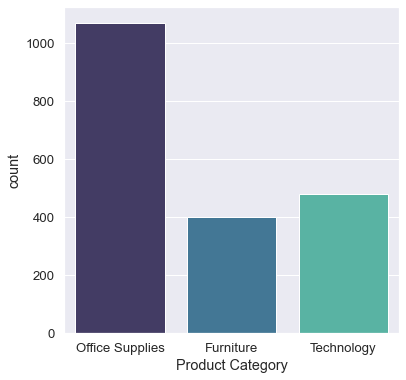

In [13]:
sns.countplot(data = dataset, x = 'Product Category', palette='mako')

In [14]:
dataset.groupby('Product Category').describe()['Profit'].T

Product Category,Furniture,Office Supplies,Technology
count,400.000000,1071.000000,481.000000
mean,148.123615,83.590112,156.555419
std,1243.728723,693.005411,1712.133260
min,-13706.464000,-2196.684000,-16476.838000
25%,-163.025800,-56.350000,-111.720000
50%,3.255000,-1.071200,15.371400
75%,236.475450,47.568600,374.625000
max,6095.860200,9228.225600,8798.183100


<AxesSubplot:xlabel='Profit', ylabel='Density'>

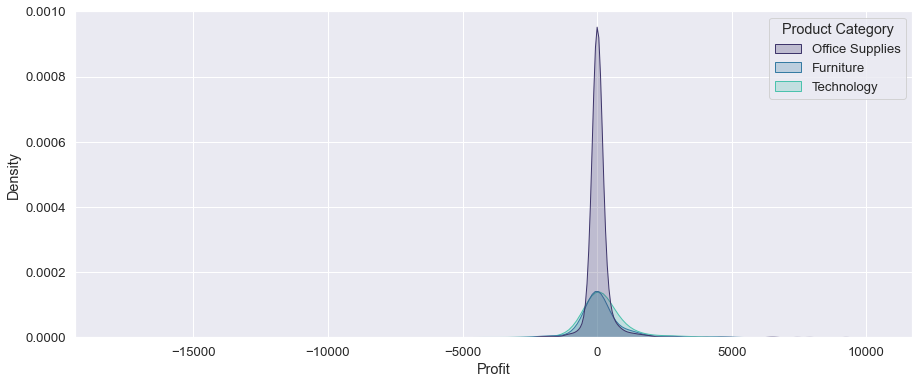

In [15]:
plt.figure(figsize = (15, 6)) 
sns.kdeplot(x = 'Profit', data = dataset, hue = 'Product Category', palette = 'mako', shade = True, warn_singular=False)

**Notes:**
* As we see from mean of each category **Technology** is highest profit even if the **Office Supplies** is more in count than the 2 of other. 
* So **Office Supplies** is more in salles but **Technology** is earn more profit.
* So we will deal with **Technology** category.

In [16]:
data = dataset[dataset['Product Category'] == 'Technology'][['State or Province', 'Profit']]
data = data.groupby('State or Province').sum()
data[data['Profit'] == data['Profit'].max()]

,Profit
State or Province,
Texas,17325.0854


**Notes:**
* As we see max profit state in **Technology** category is **Texas**.

### 5. What is the number of order in each region and it's profit ?!

<AxesSubplot:xlabel='Region', ylabel='count'>

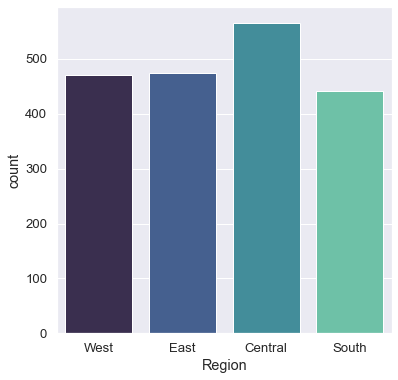

In [17]:
sns.countplot(data = dataset, x = 'Region', palette='mako')

**Notes:**
* **Central** region orders is more than others.
* **South** region is less than others.

In [18]:
data = dataset[['Region', 'Profit']].groupby('Region').sum().reset_index()
data

,Region,Profit
0,Central,77365.472669
1,East,85291.403446
2,South,-14424.054379
3,West,75844.790102


**Notes:**
* We found that we lossing money in **South** region.
* And most money comes from **East** region even it's less than **Central** in count.

### 6. In which month we have best sales ?!
### 7. In which month we have least sales ?!
We now dealing with months and we have **Order Date** feature we can deal with to extract months.

In [19]:
dataset['Month Name'] = dataset['Order Date'].dt.month_name()
dataset

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,days,Month Name
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,1,January
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,2,June
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,2,February
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,2,May
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,1,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Danville,61832,2015-03-11,2015-03-12,-116.7600,18,207.31,87536,1,March
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,Danville,61832,2015-03-11,2015-03-12,-160.9520,22,143.12,87536,1,March
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Des Plaines,60016,2015-03-29,2015-03-31,-41.8700,5,59.98,87534,2,March
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,...,Fairmont,26554,2015-04-04,2015-04-04,-24.7104,15,135.78,87537,0,April


In [20]:
data = dataset[['Month Name', 'Profit']].groupby('Month Name').sum().reset_index()
data

,Month Name,Profit
0,April,53146.412502
1,February,35944.658780
2,January,1043.677500
3,June,66836.970610
4,March,103.159587
5,May,67002.732858


**Notes:** 
* In month **May** has most profit, and **January** has the least profit.

### 8. What is the number of orders depends on it's priority and it's profit ?!

In [21]:
data = dataset[['Order Priority', 'Profit']].groupby('Order Priority').sum().reset_index()
data

,Order Priority,Profit
0,Critical,38324.837324
1,Critical,-19.099200
2,High,36500.531312
3,Low,35414.852935
4,Medium,43370.121761
5,Not Specified,70486.367706


### 9. Which state has most profit ?!

In [22]:
data = dataset[['State or Province', 'Profit']].groupby('State or Province').sum().reset_index()
data

,State or Province,Profit
0,Alabama,-2418.056600
1,Arizona,3909.753832
2,Arkansas,-1184.747200
3,California,37421.960192
4,Colorado,6965.462660
5,Connecticut,-529.106300
6,Delaware,406.741800
7,District of Columbia,11677.363100
8,Florida,86.703840
9,Georgia,11838.491414


In [23]:
data[data['Profit'] == data['Profit'].max()]

,State or Province,Profit
3,California,37421.960192


**Note:** 
* **California** is the most profit state in US.

### 10. Which state has least profit ?!

In [24]:
data[data['Profit'] == data['Profit'].min()]

,State or Province,Profit
31,North Carolina,-19427.91484


**Notes:** 
* **North Carolina** is the least profit state in US. 

### 11. Which city in most profit state has most profit ?!

In [25]:
data = dataset[dataset['State or Province'] == 'California'][['City', 'Profit']]
data

,City,Profit
1,San Gabriel,4390.3665
16,Laguna Niguel,-28.2968
17,Laguna Niguel,-5.3072
18,Lakewood,8.8940
35,Napa,845.6640
...,...,...
1911,Calexico,47.5272
1912,Camarillo,379.3965
1913,Camarillo,-41.8300
1914,Camarillo,372.4020


In [26]:
data = data.groupby('City').sum().reset_index()
data

,City,Profit
0,Apple Valley,-89.500000
1,Atascadero,28.400000
2,Bakersfield,118.270800
3,Berkeley,1167.380000
4,Beverly Hills,-30.450000
...,...,...
76,West Hollywood,521.690000
77,Whittier,192.516900
78,Woodland,31.142100
79,Yuba City,9.330000


In [27]:
data[data['Profit'] == data['Profit'].max()]

,City,Profit
33,Los Angeles,7865.83718


### 12. Which city in least profit state has least profit ?!

In [28]:
data[data['Profit'] == data['Profit'].min()]

,City,Profit
80,Yucaipa,-4118.158092


## Good Job!